# *FOO-GLE*
    - Prachi Kharat

## 1) Objective of the Report -

The objective of this report is to make a recommendation engine called "Foo-gle" for University of the Pacific for email coupon campaigns. This engine will send targeted emails to students with coupons that are likely to encourage them to come. This engine accepts three parameters names if the student eats indian food or not. If yes, how much. Second parameter would be how much veggies does he have per day. Third would be if the student has interest in ethnic food or not. Taking this input, engine will recommend coupons for the buffet. 

## 2) Data Exploration-

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler
from pandas import Series,DataFrame

First download the dataset

In [2]:
df = pd.read_csv("food_coded.csv")
df=df.dropna()

#### a) Print first 5 rows :

In [3]:
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137


#### b) Print number of rows and columns in the dataset :

In [4]:
type(df)
print("Row: ",df.shape[0])
print("Column: ",df.shape[1])

Row:  52
Column:  61


#### c) Total students from each grade :

In [5]:
grade = df['grade_level'].value_counts()
print(grade)

1    16
2    15
4    11
3    10
Name: grade_level, dtype: int64


#### d) Total number of male amd female students :

In [6]:
gender = df['Gender'].value_counts()
print(gender)

1    31
2    21
Name: Gender, dtype: int64


## 3) Dendrogram -

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


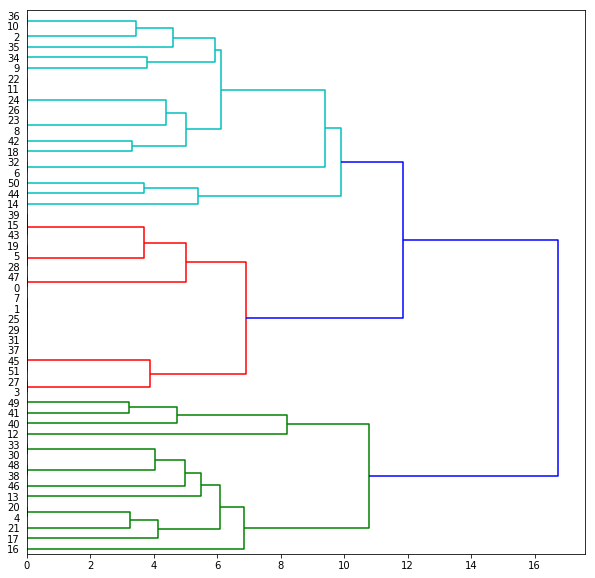

In [7]:
Dendrogram_df = df[['indian_food','veggies_day','ethnic_food']]
from sklearn.metrics.pairwise import euclidean_distances
Dendrogram_data = DataFrame(euclidean_distances(Dendrogram_df))

from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
Z = linkage(Dendrogram_data, 'average')
plt.figure(figsize=(10, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=10)

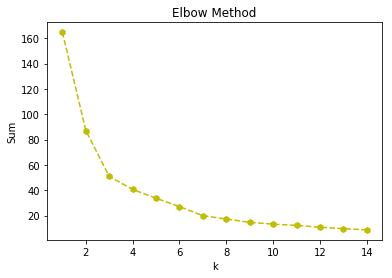

In [8]:
dmms=MinMaxScaler()
dmms.fit(Dendrogram_data)
dtrans=dmms.transform(Dendrogram_data)

dsum=[]
K=range(1,15)
for k in K:
    dkm=KMeans(n_clusters=k)
    dkm=dkm.fit(dtrans)
    dsum.append(dkm.inertia_)
    
plt.plot(K,dsum,'yh--')
plt.xlabel('k')
plt.ylabel('Sum')
plt.title('Elbow Method')
plt.show()

From the above plot and dendogram, we select to make 3 clusters at till three we see maximum difference.

## 4) Step-by-step Kmeans -

In [9]:
centroid1 = np.array([2,4])
centroid2 = np.array([3, 3])
centroid3 = np.array([4, 2])
def KMEANS(centroid1,centroid2,centroid3,dataframe,k):
    
    dataframe=Dendrogram_df
    k=3
    Dendrogram_df["Dist_C1"] = np.sqrt((Dendrogram_df.veggies_day - centroid1[0])**2 
                             + (Dendrogram_df.indian_food - centroid1[1])**2)
    
    Dendrogram_df["Dist_C2"] = np.sqrt((Dendrogram_df.veggies_day - centroid2[0])**2 
                             + (Dendrogram_df.indian_food - centroid2[1])**2)
    Dendrogram_df["Dist_C3"] = np.sqrt((Dendrogram_df.veggies_day - centroid3[0])**2 + 
                               (Dendrogram_df.indian_food - centroid3[1])**2)

    Dendrogram_df["Association"] = np.where((Dendrogram_df.Dist_C1 < Dendrogram_df.Dist_C2) & (Dendrogram_df.Dist_C1 < Dendrogram_df.Dist_C3), 1,  np.where((Dendrogram_df.Dist_C2 < Dendrogram_df.Dist_C1) & (Dendrogram_df.Dist_C2 < Dendrogram_df.Dist_C3) , 2, 3))

    centroid1 = Dendrogram_df[Dendrogram_df.Association == 1][["veggies_day", "indian_food"]].mean()
    centroid2 = Dendrogram_df[Dendrogram_df.Association == 2][["veggies_day", "indian_food"]].mean()
    centroid3 = Dendrogram_df[Dendrogram_df.Association == 3][["veggies_day", "indian_food"]].mean()
    return(centroid1,centroid2,centroid3)


#### First Iteration:

In [10]:
dataframe=Dendrogram_df
k=3
dfi=KMEANS(centroid1,centroid2,centroid3,dataframe,k)
dfi

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

(veggies_day    2.5
 indian_food    4.5
 dtype: float64, veggies_day    4.117647
 indian_food    4.117647
 dtype: float64, veggies_day    4.151515
 indian_food    2.272727
 dtype: float64)

#### 2 iteration 

In [11]:
dfi2 = KMEANS(dfi[0],dfi[1],dfi[2],dataframe,k)
dfi2

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

(veggies_day    2.333333
 indian_food    4.000000
 dtype: float64, veggies_day    4.611111
 indian_food    4.555556
 dtype: float64, veggies_day    3.935484
 indian_food    1.935484
 dtype: float64)

#### 3 iteration

In [12]:
dfi3 = KMEANS(dfi2[0],dfi2[1],dfi2[2],dataframe,k)
dfi3

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

(veggies_day    2.666667
 indian_food    3.500000
 dtype: float64, veggies_day    4.611111
 indian_food    4.555556
 dtype: float64, veggies_day    4.035714
 indian_food    1.821429
 dtype: float64)

#### 4th iteration

In [13]:
dfi4 = KMEANS(dfi3[0],dfi3[1],dfi3[2],dataframe,k)
dfi4

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

(veggies_day    2.428571
 indian_food    3.142857
 dtype: float64, veggies_day    4.611111
 indian_food    4.555556
 dtype: float64, veggies_day    4.148148
 indian_food    1.851852
 dtype: float64)

#### 5th iteration

In [14]:
dfi5 = KMEANS(dfi4[0],dfi4[1],dfi4[2],dataframe,k)
dfi5

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

(veggies_day    2.250
 indian_food    2.375
 dtype: float64, veggies_day    4.526316
 indian_food    4.578947
 dtype: float64, veggies_day    4.32
 indian_food    1.92
 dtype: float64)

#### 6th iteration

In [15]:
dfi6 = KMEANS(dfi5[0],dfi5[1],dfi5[2],dataframe,k)
dfi6

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

(veggies_day    2.4
 indian_food    2.1
 dtype: float64, veggies_day    4.526316
 indian_food    4.578947
 dtype: float64, veggies_day    4.434783
 indian_food    2.000000
 dtype: float64)

#### Final iteration

In [16]:
dfi7 = KMEANS(dfi6[0],dfi6[1],dfi6[2],dataframe,k)
dfi7

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

(veggies_day    2.4
 indian_food    2.1
 dtype: float64, veggies_day    4.526316
 indian_food    4.578947
 dtype: float64, veggies_day    4.434783
 indian_food    2.000000
 dtype: float64)

we will stop at 7TH iteration as this is where centroids dont change.

## 5) sklearn.cluster

In [17]:
df3 = df[['indian_food','veggies_day','ethnic_food']] #change

# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
model.labels_

array([2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2,
       0, 2, 0, 2, 1, 1, 0, 2])

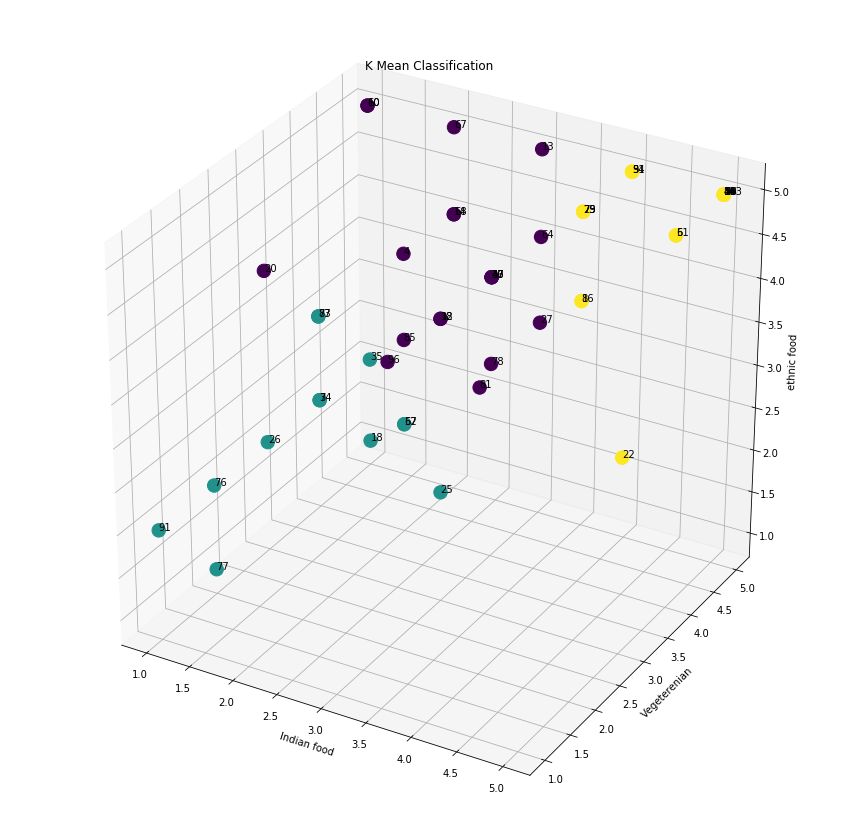

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(xs = df3.indian_food, ys = df3.veggies_day, zs = df3.ethnic_food, c = model.labels_, 
           s = 180, depthshade = False)

plt.title('K Mean Classification')
for x, y, z,l in zip(df3.indian_food,df3.veggies_day,df3.ethnic_food,df3.index):
    ax.text(x, y, z,l)

ax.set_xlabel('Indian food')
ax.set_ylabel('Vegeterenian')
ax.set_zlabel('ethnic food')

plt.show()

## 6) Prediction

In [20]:
def pred(veggies_day,indian_food,ethnic_food):
        colormap = np.array(['Cluster 1', 'Cluster 2', 'Cluster 3'])
        data_class = model.predict(np.array([veggies_day, indian_food, ethnic_food]).reshape(1,-1))[0]
        return (colormap[data_class])
for i in range(1,11):

        veggies_day = float(input('veggies day: '))
        indian_food = float(input('indian_food: '))
        ethnic_food = float(input('ethnic_food: '))
        clusters=pred(veggies_day,indian_food,ethnic_food)
        print(i)
        print(clusters)
        if clusters=='Cluster 1':
            print(" You will get 2$ Coupon")
        elif clusters=='Cluster 2':
            print(" You will get 10$ Coupon")
        else:
            print("You will get 20$ Coupon")
        print("-----------------")

veggies day: 1
indian_food: 1
ethnic_food: 1
1
Cluster 2
 You will get 10$ Coupon
-----------------
veggies day: 2
indian_food: 2
ethnic_food: 2
2
Cluster 2
 You will get 10$ Coupon
-----------------
veggies day: 4
indian_food: 4
ethnic_food: 5
3
Cluster 3
You will get 20$ Coupon
-----------------
veggies day: 1
indian_food: 3
ethnic_food: 2
4
Cluster 2
 You will get 10$ Coupon
-----------------
veggies day: 1
indian_food: 2
ethnic_food: 1
5
Cluster 2
 You will get 10$ Coupon
-----------------
veggies day: 1
indian_food: 4
ethnic_food: 5
6
Cluster 1
 You will get 2$ Coupon
-----------------
veggies day: 5
indian_food: 5
ethnic_food: 2
7
Cluster 3
You will get 20$ Coupon
-----------------
veggies day: 2
indian_food: 5
ethnic_food: 4
8
Cluster 1
 You will get 2$ Coupon
-----------------
veggies day: 2
indian_food: 3
ethnic_food: 4
9
Cluster 1
 You will get 2$ Coupon
-----------------
veggies day: 1
indian_food: 4
ethnic_food: 5
10
Cluster 1
 You will get 2$ Coupon
-----------------


The above is the recommendation engine which will provide coupons on students input.

## 7) 2D Prediction Mesh (Extra Credits)

Text(0,0.5,'indain food')

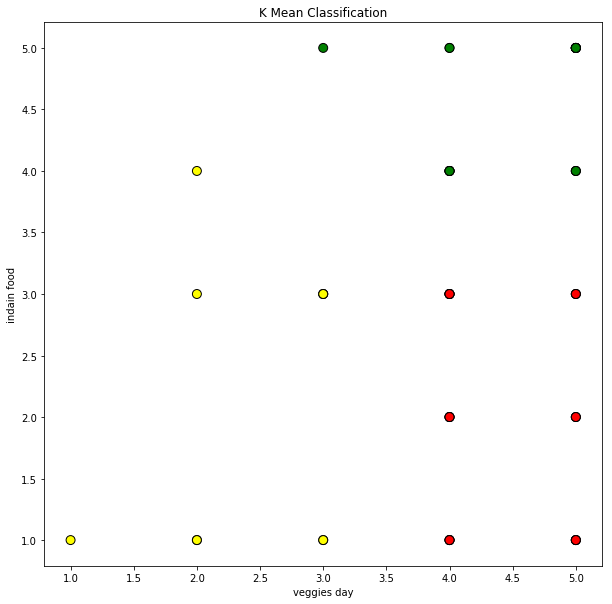

In [21]:
df2 = df[['veggies_day','indian_food']]
df3 = df[['veggies_day','indian_food','weight']]

# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(df2)

# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(df2)

fig = plt.figure(figsize=(10, 10))
 
# Create a colormap
colormap = np.array(['green', 'red','yellow'])
 
plt.scatter(df2.veggies_day, df2.indian_food, c=colormap[model.labels_], edgecolor = 'black', s = 80)
plt.title('K Mean Classification')
plt.xlabel('veggies day')
plt.ylabel('indain food')

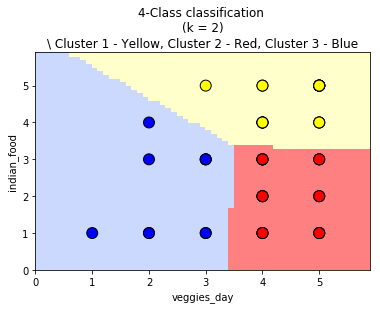

In [22]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff'])
    colormap = np.array(['yellow', 'red', 'blue'])

    x_min, x_max = df2.veggies_day.min() - 1, df2.veggies_day.max() + 1
    y_min, y_max = df2.indian_food.min() - 1, df2.indian_food.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(df2.veggies_day, df2.indian_food, c = colormap[model.labels_], edgecolor = 'black', s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)\n\ Cluster 1 - Yellow, Cluster 2 - Red, Cluster 3 - Blue" % (2))
    plt.xlabel('veggies_day')
    plt.ylabel('indian_food')


    
    
plotMesh()

The above 2D mesh shows the three clusters of kmeans for students who eat indian food and have veggies.

## 8) Summary

We first used elbow method to find the number of clusters to make, from which we find that we should make three clusters. Then we used k-means to make these clusters. We have considered three parameters namely veggies students have per day, if they have indian food and if they have ethnic food. If a student is not interested in indian food and veggies, then he will get 20 USD coupon to encourage him. If a student is interested in veggies and not that interested in indian food, he will get 10 USD coupons. If a student is interested in both, then he will get USD 2 coupon as he will eventually go to buffet for this.  